# 回归

## 线性回归
- 优点：结果易于理解，计算上不复杂
- 缺点：对非线性的数据拟合不好

In [22]:
import numpy as np

def loadDataSet(fileName):
    dataMat, labelMat = [], []
    with open(fileName) as f:
        for line in f.readlines():
            curLine = line.strip().split('\t')
            curLine = list(map(float, curLine))
            dataMat.append(curLine[:-1])
            labelMat.append(curLine[-1])
    return dataMat, labelMat

def standRegres(xArr, yArr):
    xMat = np.mat(xArr)
    yMat = np.mat(yArr).T
    xTx = xMat.T * xMat
    if np.linalg.det(xTx) == 0.0:
        print('This matrix is singular, cannot do inverse')
        return 
    return xTx.I * (xMat.T * yMat)

In [23]:
xArr, yArr = loadDataSet('./ex0.txt')

In [30]:
xArr[0:2]

[[1.0, 0.067732], [1.0, 0.42781]]

In [25]:
ws = standRegres(xArr, yArr)

In [26]:
ws

matrix([[3.00774324],
        [1.69532264]])

In [32]:
xMat = np.mat(xArr)
yMat = np.mat(yArr)
print(xMat.shape)
print(yMat.shape)
yHat = xMat * ws

(200, 2)
(1, 200)


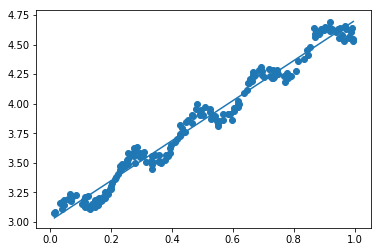

In [41]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(xMat[:, 1].flatten().A[0], yMat[0, :].flatten().A[0])
xCopy = xMat.copy()
xCopy.sort(0)
yHat = xCopy*ws
ax.plot(xCopy[:, 1], yHat)
plt.show()

In [45]:
yHat = xMat*ws
np.corrcoef(yHat.T, yMat)

array([[1.        , 0.98647356],
       [0.98647356, 1.        ]])

In [67]:
def lwlr(testPoint, xArr, yArr, k = 1.0):
    xMat = np.mat(xArr)
    yMat = np.mat(yArr).T
    m = xMat.shape[0]
    weights = np.mat(np.eye((m)))
    for j in range(m):
        diffMat = testPoint - xMat[j, :]
        weights[j, j] = np.exp(diffMat*diffMat.T /(-2.0 *k**2))
    xTx = xMat.T * (weights * xMat)
    if np.linalg.det(xTx) == 0.0:
        print('This matrix is singular, cannot do inverse')
        return 
    wx = xTx.I * ( xMat.T * (weights * yMat))
    return testPoint * wx

def lwlrtest(testArr, xArr, yArr, k=1.0):
    m = np.shape(testArr)[0]
    yHat = np.zeros(m)
    for i in range(m):
        yHat[i] = lwlr(testArr[i], xArr, yArr, k)
    return yHat

In [68]:
xArr, yArr = loadDataSet('./ex0.txt')
lwlr(xArr[0], xArr, yArr, 1.0)

matrix([[3.12204471]])

In [69]:
yHat = lwlrtest(xArr, xArr, yArr)

In [70]:
yHat

array([3.12204471, 3.73284336, 4.69692033, 4.25997574, 4.67205815,
       3.89979584, 3.64981617, 3.06462993, 3.23234485, 3.24169633,
       3.42741618, 4.10707034, 4.24787613, 3.40879727, 4.65288661,
       4.03784328, 3.61542726, 3.25787329, 4.08932965, 3.39783761,
       3.12629106, 3.12106493, 4.57784181, 4.22499774, 3.03329674,
       3.57546269, 3.07586196, 3.36765021, 4.05435451, 3.92530073,
       3.08411123, 3.22212205, 3.95125595, 4.53636662, 4.63368585,
       3.47279924, 3.67613549, 4.48770772, 3.70250157, 4.54964976,
       3.29004763, 4.13549978, 3.45441958, 3.39926586, 3.9452161 ,
       3.08816389, 3.62751621, 3.84688831, 3.84428111, 4.35125277,
       4.31315478, 3.43422203, 3.31571015, 4.3785447 , 3.57384393,
       3.58150337, 3.7748906 , 4.18601319, 4.00967978, 3.52940957,
       3.25875168, 4.19859322, 4.23146773, 4.13867447, 3.21901745,
       4.0561676 , 3.65354789, 3.66128122, 4.325913  , 3.2040255 ,
       3.20300481, 4.13294306, 3.43941808, 4.69379223, 3.50821

In [71]:
xMat = np.mat(xArr)
srtInd = xMat[:, 1].argsort(0)
xSort = xMat[srtInd][:,0,:]

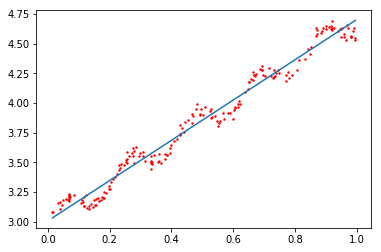

In [72]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(xSort[:,1], yHat[srtInd])
ax.scatter(xMat[:, 1].flatten().A[0], np.mat(yArr).T.flatten().A[0], s = 2, c='red')
plt.show()